# Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from IPython.display import Image
from IPython.core.display import HTML


In [2]:
import os
# Next line was done as this was run in a windows machine. This line may need to changed for each os.
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from sklearn.tree import DecisionTreeClassifier
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

# Initial Data Analysis

In [3]:
df = pd.read_csv('heart disease classification dataset.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [5]:
print(list(df.columns)) 

['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [6]:
df.describe()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.00,303.00,303.00,299.00,302.00,303.00,303.00,298.00,303.00,303.00,303.00,303.00,303.00
mean,151.00,54.37,0.97,131.71,246.32,0.15,0.53,149.87,0.33,1.04,1.40,0.73,2.31
std,87.61,9.08,1.03,17.63,51.91,0.36,0.53,22.56,0.47,1.16,0.62,1.02,0.61
min,0.00,29.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00
25%,75.50,47.50,0.00,120.00,211.00,0.00,0.00,134.50,0.00,0.00,1.00,0.00,2.00
50%,151.00,55.00,1.00,130.00,240.50,0.00,1.00,152.50,0.00,0.80,1.00,0.00,2.00
75%,226.50,61.00,2.00,140.00,274.75,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00
max,302.00,77.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00


In [7]:
df.shape

(303, 15)

In [8]:
pd.isna(df).sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [9]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [10]:
df = df.drop('Unnamed: 0', 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


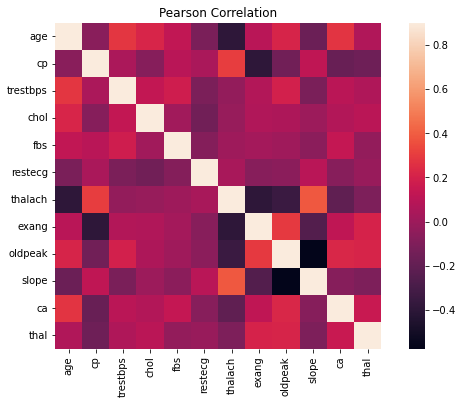

In [11]:
#heatmap correlation
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), vmax = 0.9, square = True)
plt.title("Pearson Correlation")
plt.show()

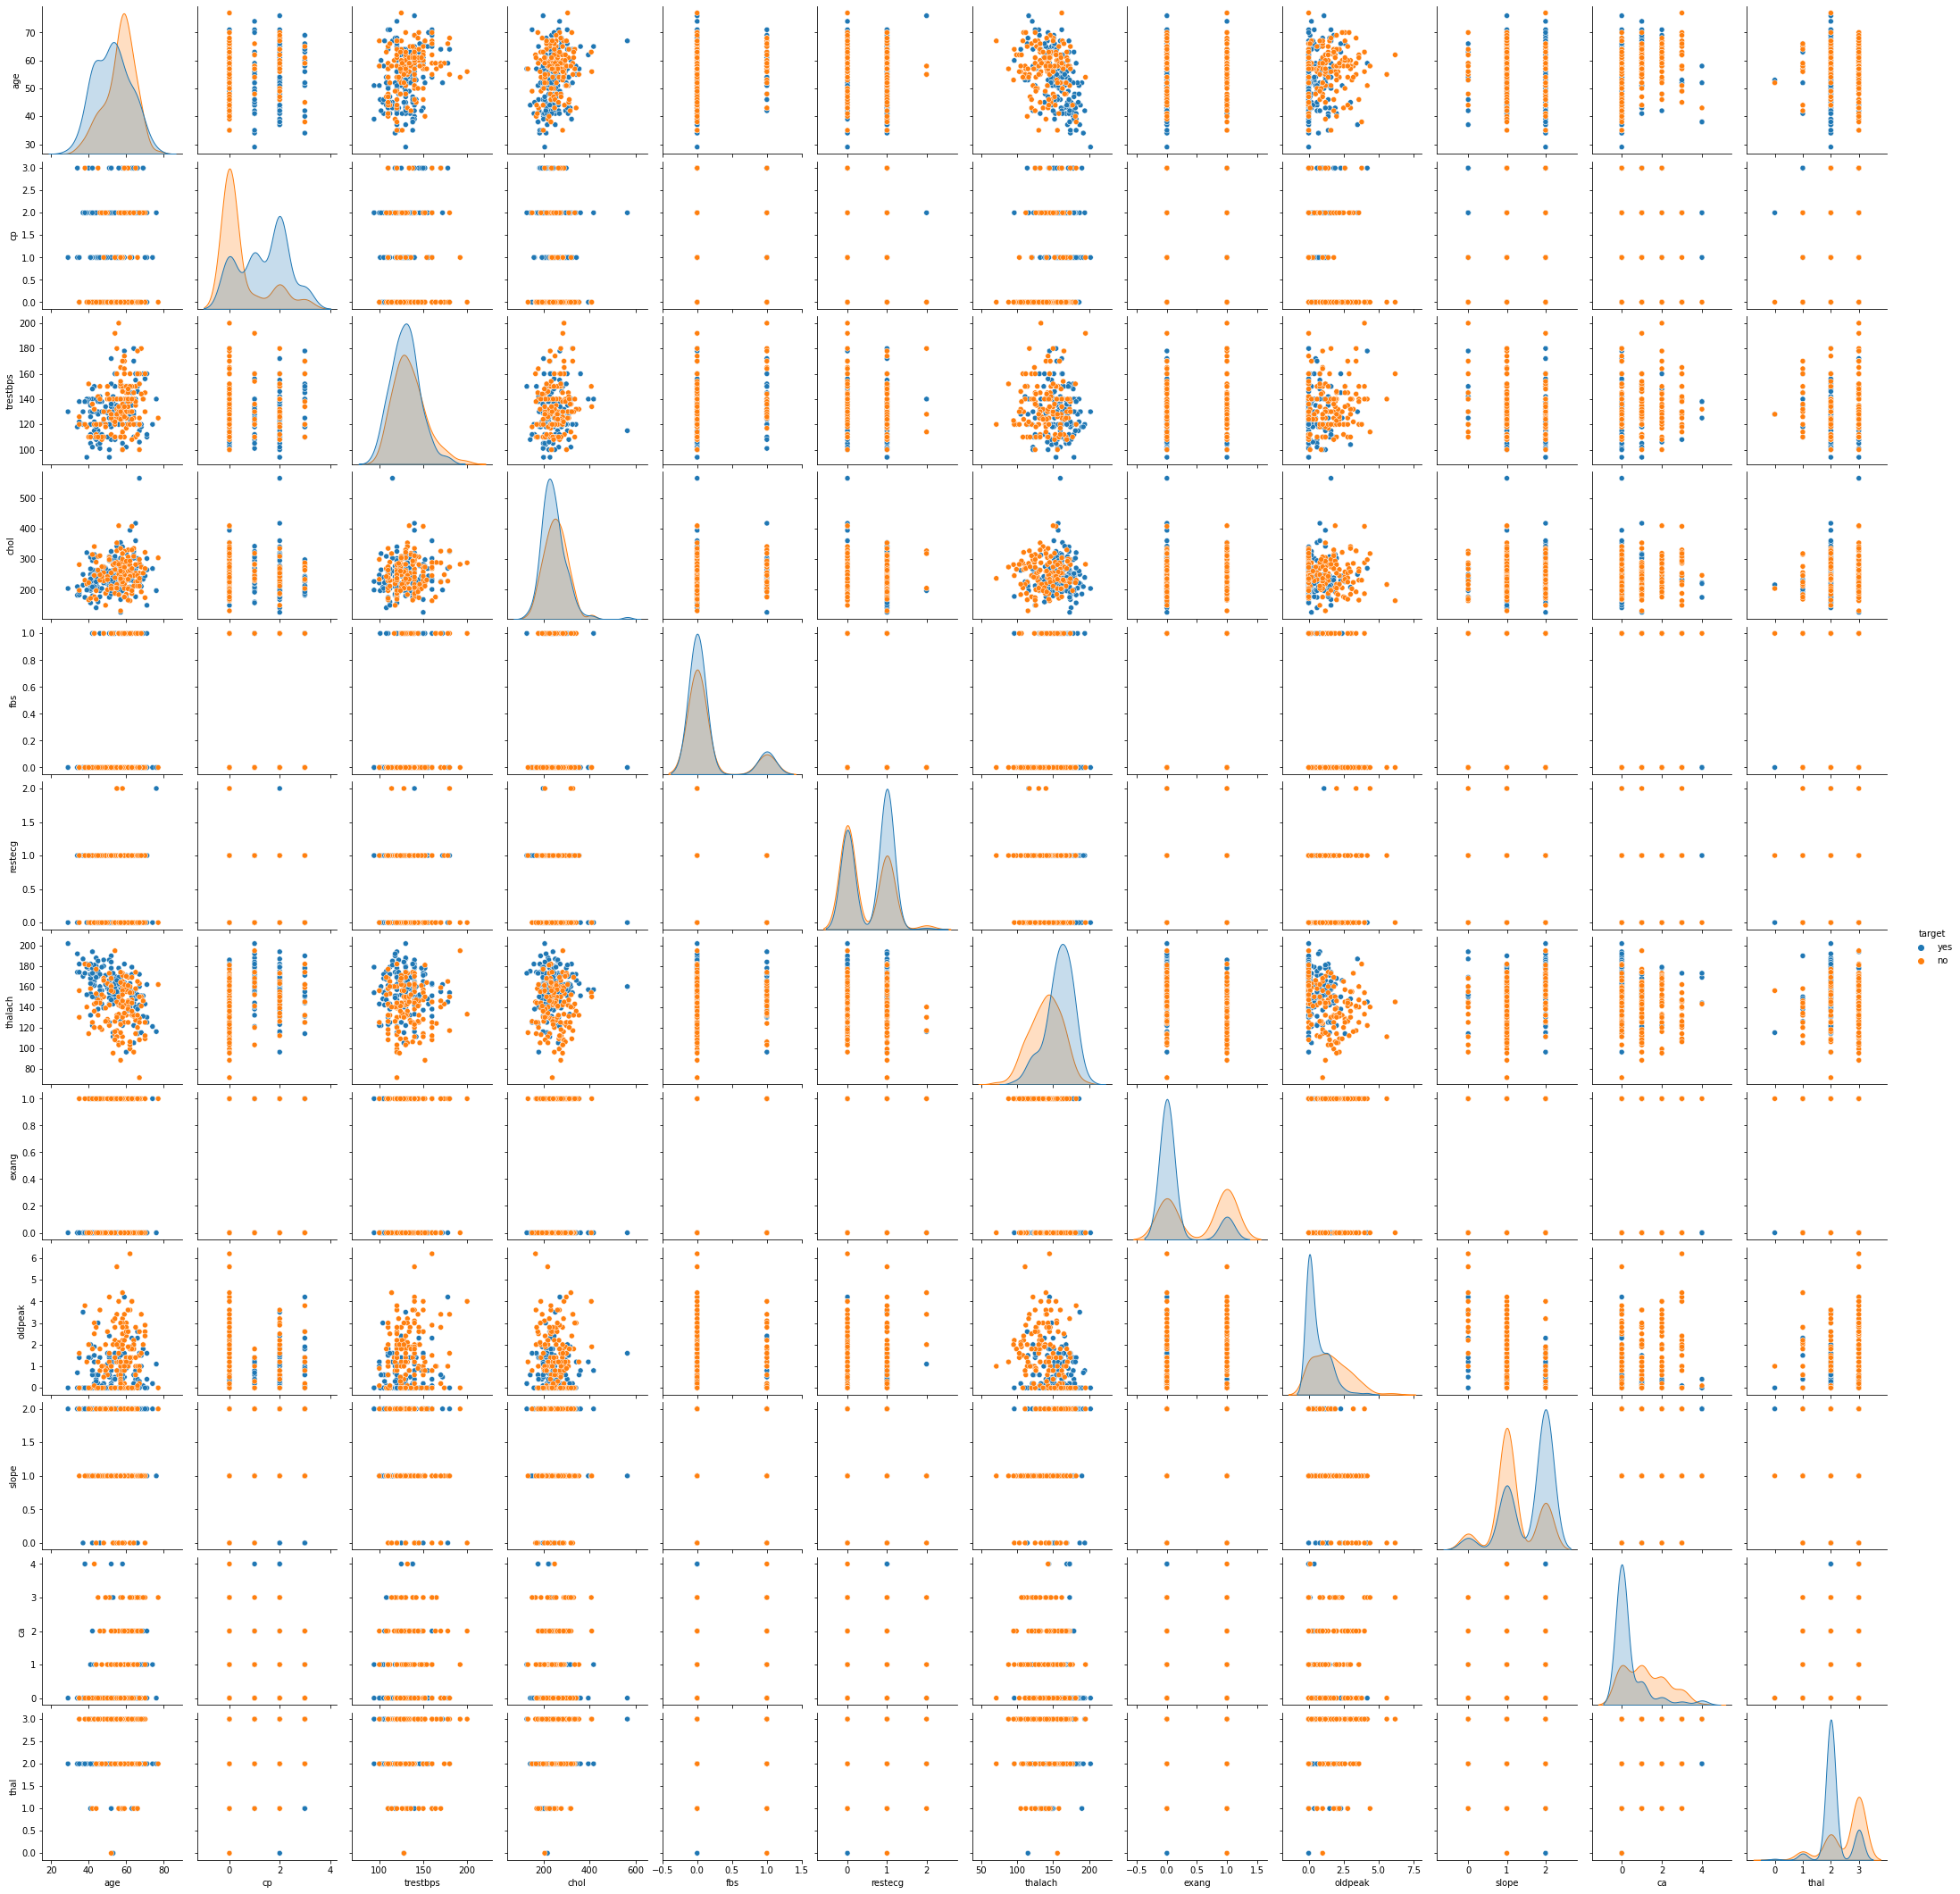

In [12]:
pair_plot_df = df.copy(True)
pair_plot_df.drop(columns=['target'])
sns.pairplot(pair_plot_df, hue= 'target')

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

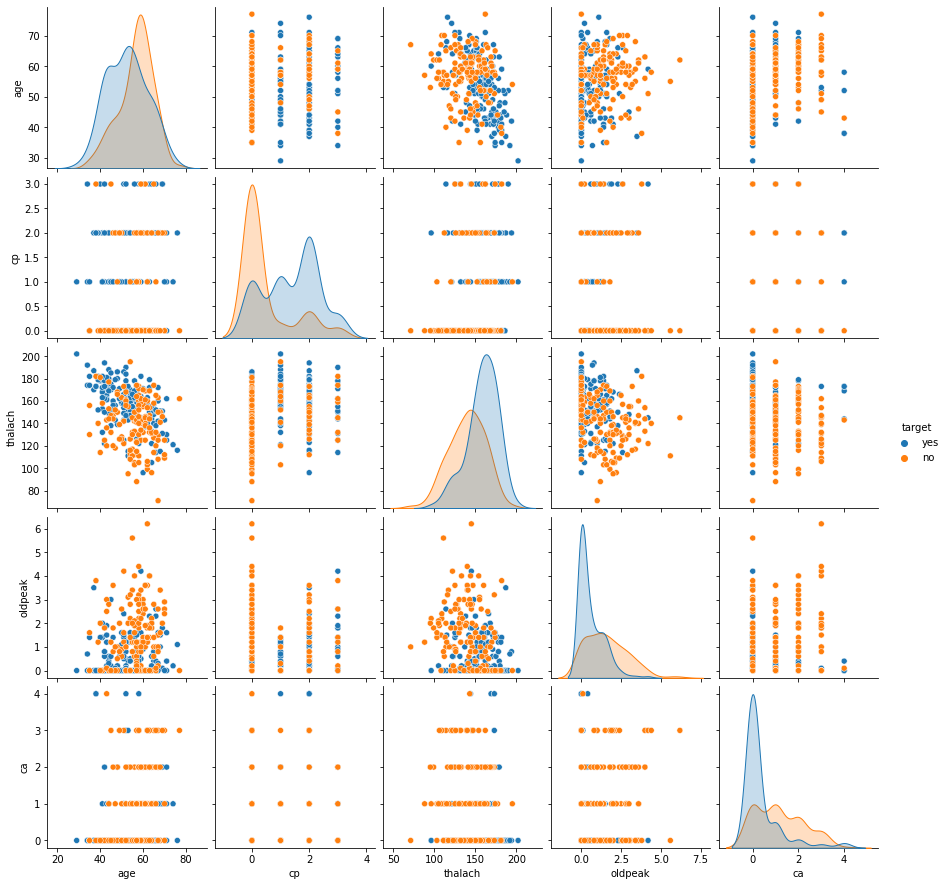

In [14]:
sns.pairplot(df[['age', 'cp', 'thalach', 'oldpeak', 'ca', 'target']], hue='target')

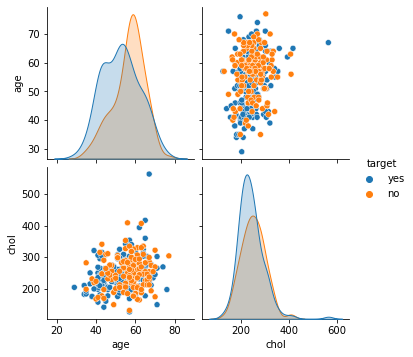

In [15]:
sns.pairplot(df[['age', 'chol', 'target']], hue='target')

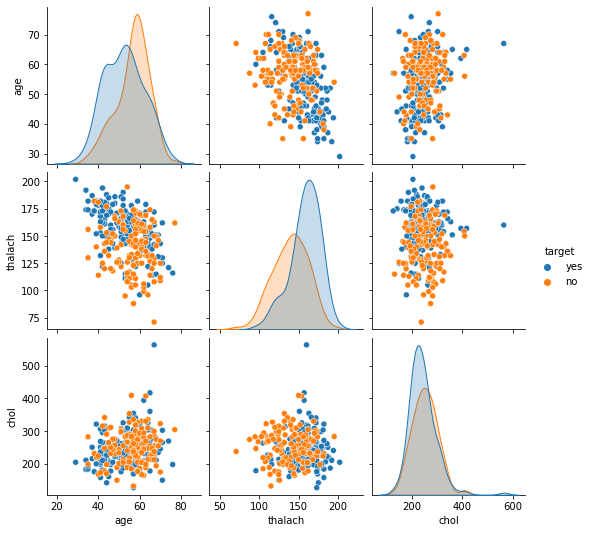

In [16]:
sns.pairplot(df[['age', 'thalach', 'chol', 'target']], hue='target')

In [17]:
df['target'].value_counts()

yes    165
no     138
Name: target, dtype: int64

# Data Preprocessing

In [18]:
df.dropna(inplace = True)

In [19]:
#transform categorical variable
df['sex'] = df['sex'].astype('category')
df['target'] = df['target'].astype('category')

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
5,57,male,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,yes


In [21]:
#handling categorical data
df = pd.DataFrame(df)
df['sex'] = df['sex'].cat.codes
df['target'] = df['target'].cat.codes
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


# Train Test Split

In [22]:
X = df.drop('target', axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(205, 13)
(205,)
(88, 13)
(88,)


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X) # n_components = 3, then you have to do a special 3d plot (plotly for interactive)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

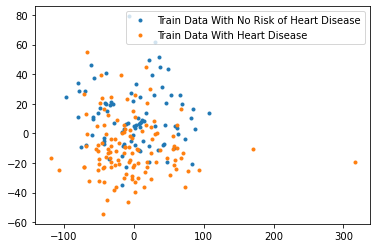

In [24]:
plt.plot(X_train_pca[y_train==0][:,0], X_train_pca[y_train==0][:,1], '.', label= 'Train Data With No Risk of Heart Disease')
plt.plot(X_train_pca[y_train==1][:,0], X_train_pca[y_train==1][:,1], '.', label= 'Train Data With Heart Disease')
plt.legend()
# train and test look like the same distribution
# can't be properly separated with only 2 dimensons (via pca at least)

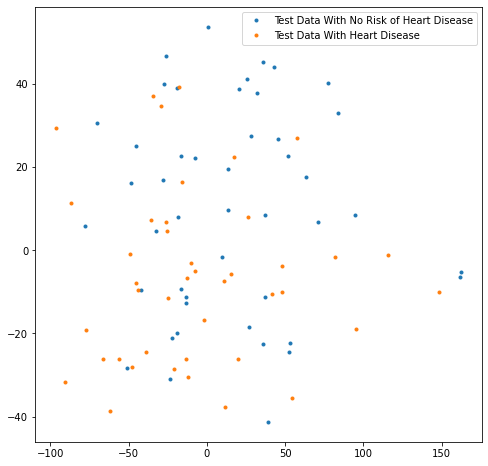

In [25]:
fig = plt.figure(figsize=(8, 8))
plt.plot(X_test_pca[y_test==0][:,0], X_test_pca[y_test==0][:,1], '.', label= 'Test Data With No Risk of Heart Disease')
plt.plot(X_test_pca[y_test==1][:,0], X_test_pca[y_test==1][:,1], '.', label= 'Test Data With Heart Disease')
plt.legend()

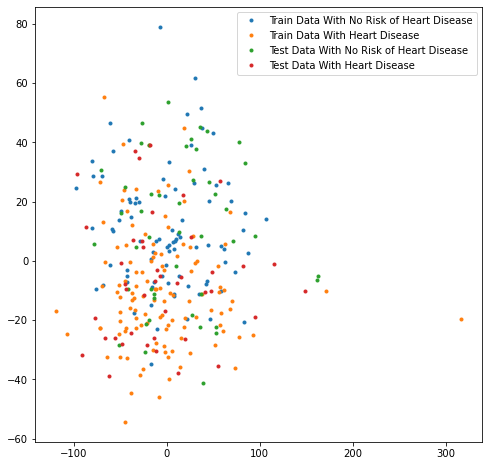

In [26]:
fig = plt.figure(figsize=(8, 8))
plt.plot(X_train_pca[y_train==0][:,0], X_train_pca[y_train==0][:,1], '.', label= 'Train Data With No Risk of Heart Disease')
plt.plot(X_train_pca[y_train==1][:,0], X_train_pca[y_train==1][:,1], '.', label= 'Train Data With Heart Disease')
plt.plot(X_test_pca[y_test==0][:,0], X_test_pca[y_test==0][:,1], '.', label= 'Test Data With No Risk of Heart Disease')
plt.plot(X_test_pca[y_test==1][:,0], X_test_pca[y_test==1][:,1], '.', label= 'Test Data With Heart Disease')
plt.legend()

# Base Classifiers

In [27]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel = 'linear', gamma = 'auto', C = 5, probability = True),
    DecisionTreeClassifier(max_depth = 3),
    GaussianNB(),
    MultinomialNB()
]

In [28]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)

base_classifer_performances = []

for clf in classifiers:
    clf.fit(X_train, y_train) # get the best one?
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')

    train_predictions = clf.predict(X_test)
    cross_val_scores = cross_val_score(clf, X, y, cv=strat_k_fold, scoring='accuracy')
    print(f'Average Cross Validation Score: {cross_val_scores.mean()}')

    base_classifer_performances.append((name, clf, train_predictions, cross_val_scores, cross_val_scores.mean()))
    
print("=" * 30)

KNeighborsClassifier
****Results****
Average Cross Validation Score: 0.6349425287356322
SVC
****Results****
Average Cross Validation Score: 0.8496551724137931
DecisionTreeClassifier
****Results****
Average Cross Validation Score: 0.8154022988505748
GaussianNB
****Results****
Average Cross Validation Score: 0.8191954022988506
MultinomialNB
****Results****
Average Cross Validation Score: 0.7368965517241379


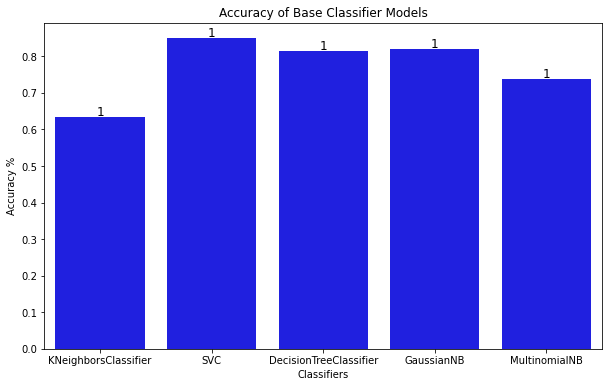

In [29]:
#visualize accuracy models
fig = plt.figure(figsize = (10,6))
bars = sns.barplot(x = [base_classifer_performances[i][0] for i in range(len(base_classifer_performances))], y = [base_classifer_performances[i][4] for i in range(len(base_classifer_performances))], color = "blue")
for bar in bars.patches:
    bars.annotate("%.0f" % bar.get_height(), (bar.get_x() + bar.get_width()/2, bar.get_height()),
        ha='center', va='center', fontsize=12, color='black', xytext=(0,5), textcoords='offset points')
plt.ylabel('Accuracy %')
plt.xlabel('Classifiers')
plt.title('Accuracy of Base Classifier Models')
plt.show()

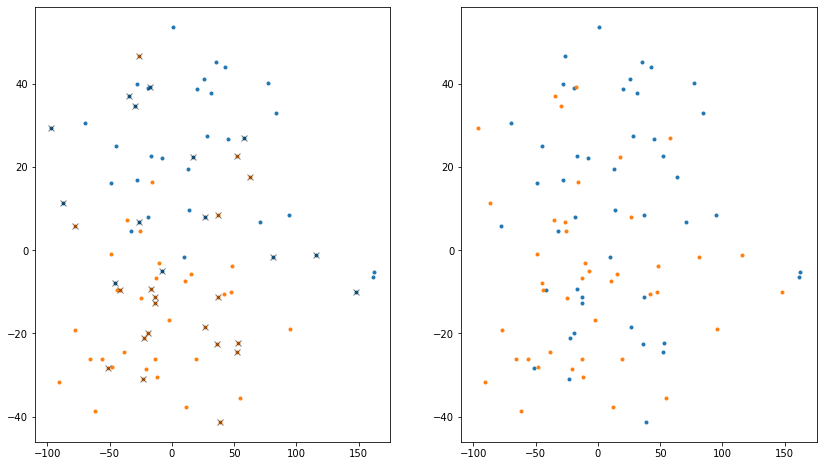

In [30]:
# K-Means
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(X_test_pca[base_classifer_performances[0][2]==0][:,0], X_test_pca[base_classifer_performances[0][2]==0][:,1], '.')
plt.plot(X_test_pca[base_classifer_performances[0][2]==1][:,0], X_test_pca[base_classifer_performances[0][2]==1][:,1], '.')
plt.plot(X_test_pca[base_classifer_performances[0][2]!=y_test][:,0], X_test_pca[base_classifer_performances[0][2]!=y_test][:,1], 'x', color='black', alpha=0.5)
plt.subplot(1,2,2)
plt.plot(X_test_pca[y_test==0][:,0], X_test_pca[y_test==0][:,1], '.')
plt.plot(X_test_pca[y_test==1][:,0], X_test_pca[y_test==1][:,1], '.')
# plt.plot(X_test_pca[predictions[0]!=y_test][:,0], X_test_pca[predictions[0]!=y_test][:,1], 'x', color='black', alpha=0.5)

# CONCLUSION: the data is not very globular, at least in this form. makes sense that knn is making the mistakes it is making
# WHY: kmeans looks at how close points are from each other. in 2d data there is somewhat uniform density, and the classes from different points are close
# OPTIONAL: for some models you can do extra, like showing the dicision tree diagram (maybe try a 3d plot) 
# mesh grid - knn predict on mesh grid

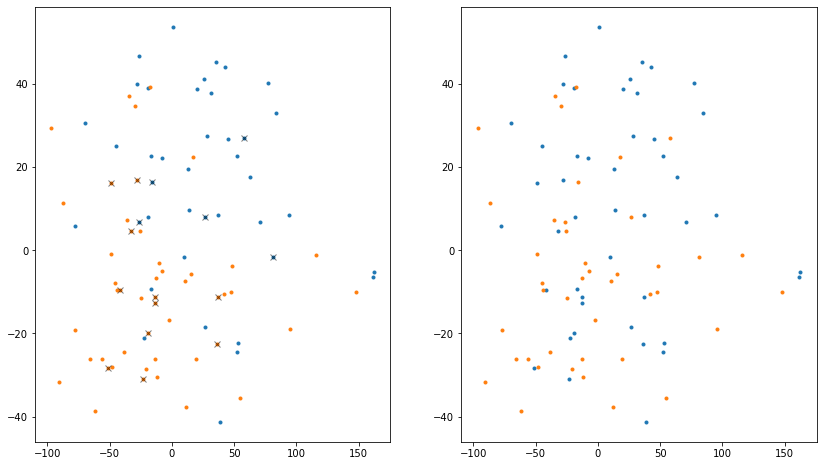

In [31]:
# SVC
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(X_test_pca[base_classifer_performances[1][2]==0][:,0], X_test_pca[base_classifer_performances[1][2]==0][:,1], '.')
plt.plot(X_test_pca[base_classifer_performances[1][2]==1][:,0], X_test_pca[base_classifer_performances[1][2]==1][:,1], '.')
plt.plot(X_test_pca[base_classifer_performances[1][2]!=y_test][:,0], X_test_pca[base_classifer_performances[1][2]!=y_test][:,1], 'x', color='black', alpha=0.5)
plt.subplot(1,2,2)
plt.plot(X_test_pca[y_test==0][:,0], X_test_pca[y_test==0][:,1], '.')
plt.plot(X_test_pca[y_test==1][:,0], X_test_pca[y_test==1][:,1], '.')

# CONCLUSION: 
# WHY:
# OPTIONAL:

In [32]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [33]:
tree_graph_to_png(classifiers[2], X.columns, 'base_decision_tree.png')

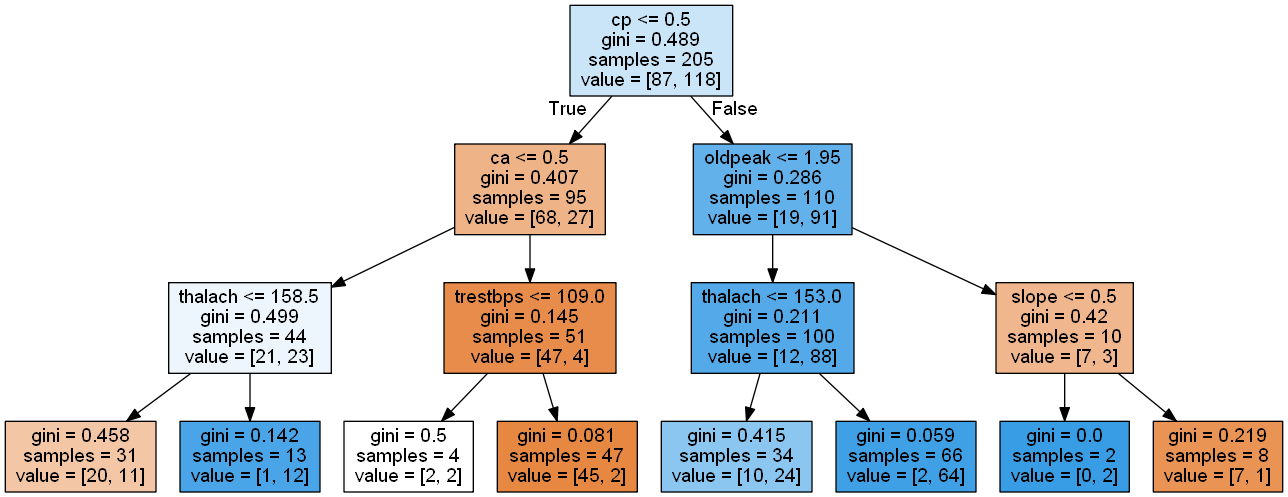

In [34]:
PATH = "base_decision_tree.png"
Image(filename = PATH , width=900, height=600)

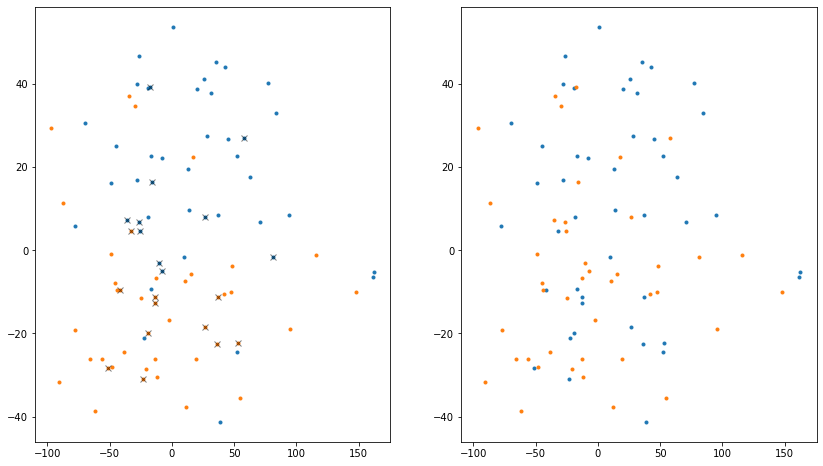

In [51]:
# Gaussian NB
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(X_test_pca[base_classifer_performances[3][2]==0][:,0], X_test_pca[base_classifer_performances[3][2]==0][:,1], '.')
plt.plot(X_test_pca[base_classifer_performances[3][2]==1][:,0], X_test_pca[base_classifer_performances[3][2]==1][:,1], '.')
plt.plot(X_test_pca[base_classifer_performances[3][2]!=y_test][:,0], X_test_pca[base_classifer_performances[3][2]!=y_test][:,1], 'x', color='black', alpha=0.5)
plt.subplot(1,2,2)
plt.plot(X_test_pca[y_test==0][:,0], X_test_pca[y_test==0][:,1], '.')
plt.plot(X_test_pca[y_test==1][:,0], X_test_pca[y_test==1][:,1], '.')

# CONCLUSION: 
# WHY:
# OPTIONAL:

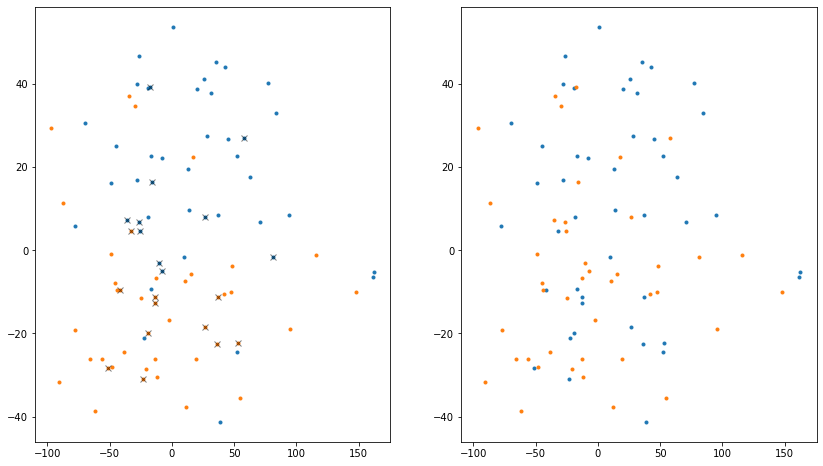

In [52]:
# Gaussian NB
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(X_test_pca[base_classifer_performances[3][2]==0][:,0], X_test_pca[base_classifer_performances[3][2]==0][:,1], '.')
plt.plot(X_test_pca[base_classifer_performances[3][2]==1][:,0], X_test_pca[base_classifer_performances[3][2]==1][:,1], '.')
plt.plot(X_test_pca[base_classifer_performances[3][2]!=y_test][:,0], X_test_pca[base_classifer_performances[3][2]!=y_test][:,1], 'x', color='black', alpha=0.5)
plt.subplot(1,2,2)
plt.plot(X_test_pca[y_test==0][:,0], X_test_pca[y_test==0][:,1], '.')
plt.plot(X_test_pca[y_test==1][:,0], X_test_pca[y_test==1][:,1], '.')

# CONCLUSION: 
# WHY:
# OPTIONAL:

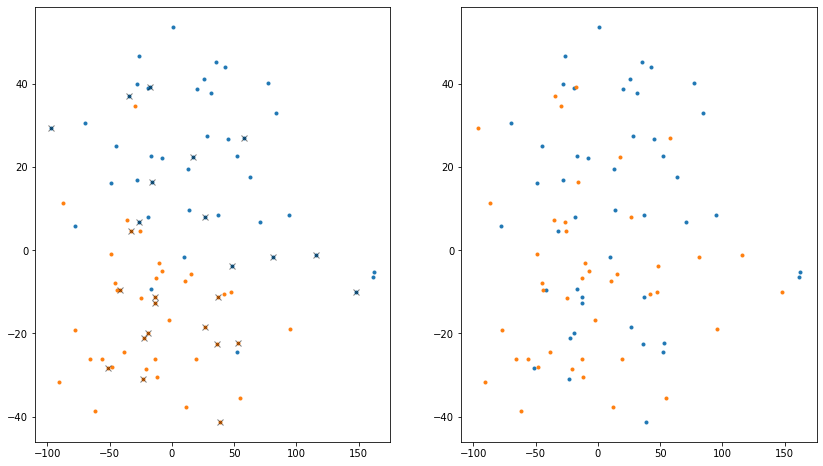

In [53]:
# Multinomial NB
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(X_test_pca[base_classifer_performances[4][2]==0][:,0], X_test_pca[base_classifer_performances[4][2]==0][:,1], '.')
plt.plot(X_test_pca[base_classifer_performances[4][2]==1][:,0], X_test_pca[base_classifer_performances[4][2]==1][:,1], '.')
plt.plot(X_test_pca[base_classifer_performances[4][2]!=y_test][:,0], X_test_pca[base_classifer_performances[4][2]!=y_test][:,1], 'x', color='black', alpha=0.5)
plt.subplot(1,2,2)
plt.plot(X_test_pca[y_test==0][:,0], X_test_pca[y_test==0][:,1], '.')
plt.plot(X_test_pca[y_test==1][:,0], X_test_pca[y_test==1][:,1], '.')

# CONCLUSION: 
# WHY:
# OPTIONAL:

# Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

params = [
    {'n_neighbors': range(5, 16, 2)}, # 5, 7, 9, 11, 13, 15
    {'kernel':['linear', 'rbf', 'sigmoid'], 'C':[0.2, 0.5, 0.75]},
    {'criterion':['gini', 'entropy'], 'max_depth':[None, 15, 10, 5]},
    {'priors': [[0.5,0.5], [0.4, 0.6], [0.6, 0.4]]}, # potentially do an unbiased (.value_counts() ratios of target in your training set, [.4, .6])
    {'alpha':[0, 0.5, 1]}
]


In [55]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)

best_classifers_performance = []
predictions = []

for i, myclf in enumerate(classifiers):
    clf = GridSearchCV(myclf, params[i], cv=5, n_jobs=-1, verbose=True)
    clf.fit(X_train, y_train) # get the best one?
    name = myclf.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    print(clf.best_params_)

    train_predictions = clf.predict(X_test)
    predictions.append(train_predictions)
    cross_val_scores = cross_val_score(clf, X, y, cv=strat_k_fold, scoring='accuracy')
    print(f'Average Cross Validation Score: {cross_val_scores.mean()}')
    
    best_classifers_performance.append((name, clf.best_params_, clf.best_estimator_, cross_val_scores, cross_val_scores.mean()))

    
print("=" * 30)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
KNeighborsClassifier
****Results****
{'n_neighbors': 9}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Average Cross Validation Score: 0.638735632183908
Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC
****Results****
{'C': 0.2, 'kernel': 'linear'}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fit

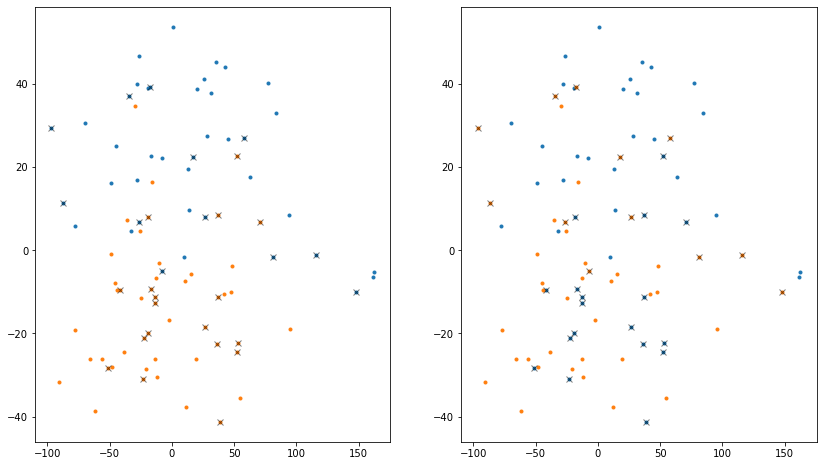

In [56]:
# K-Means
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(X_test_pca[predictions[0]==0][:,0], X_test_pca[predictions[0]==0][:,1], '.')
plt.plot(X_test_pca[predictions[0]==1][:,0], X_test_pca[predictions[0]==1][:,1], '.')
plt.plot(X_test_pca[predictions[0]!=y_test][:,0], X_test_pca[predictions[0]!=y_test][:,1], 'x', color='black', alpha=0.5)
plt.subplot(1,2,2)
plt.plot(X_test_pca[y_test==0][:,0], X_test_pca[y_test==0][:,1], '.')
plt.plot(X_test_pca[y_test==1][:,0], X_test_pca[y_test==1][:,1], '.')
plt.plot(X_test_pca[predictions[0]!=y_test][:,0], X_test_pca[predictions[0]!=y_test][:,1], 'x', color='black', alpha=0.5)

# CONCLUSION: the data is not very globular, at least in this form. makes sense that knn is making the mistakes it is making
# WHY: kmeans looks at how close points are from each other. in 2d data there is somewhat uniform density, and the classes from different points are close
# OPTIONAL: for some models you can do extra, like showing the dicision tree diagram (maybe try a 3d plot) 
# mesh grid - knn predict on mesh grid

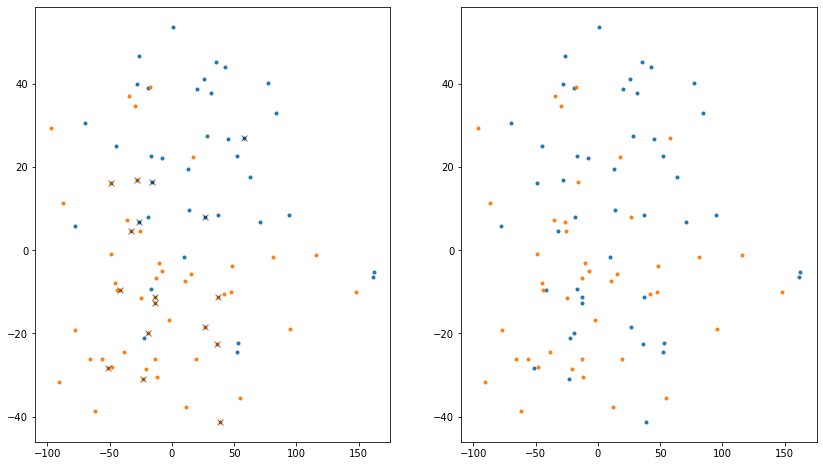

In [57]:
# SVC
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(X_test_pca[predictions[1]==0][:,0], X_test_pca[predictions[1]==0][:,1], '.')
plt.plot(X_test_pca[predictions[1]==1][:,0], X_test_pca[predictions[1]==1][:,1], '.')
plt.plot(X_test_pca[predictions[1]!=y_test][:,0], X_test_pca[predictions[1]!=y_test][:,1], 'x', color='black', alpha=0.5)
plt.subplot(1,2,2)
plt.plot(X_test_pca[y_test==0][:,0], X_test_pca[y_test==0][:,1], '.')
plt.plot(X_test_pca[y_test==1][:,0], X_test_pca[y_test==1][:,1], '.')

# CONCLUSION: 
# WHY:
# OPTIONAL:

In [58]:
tree_graph_to_png(best_classifers_performance[2][2], X.columns, 'best_decision_tree.png')

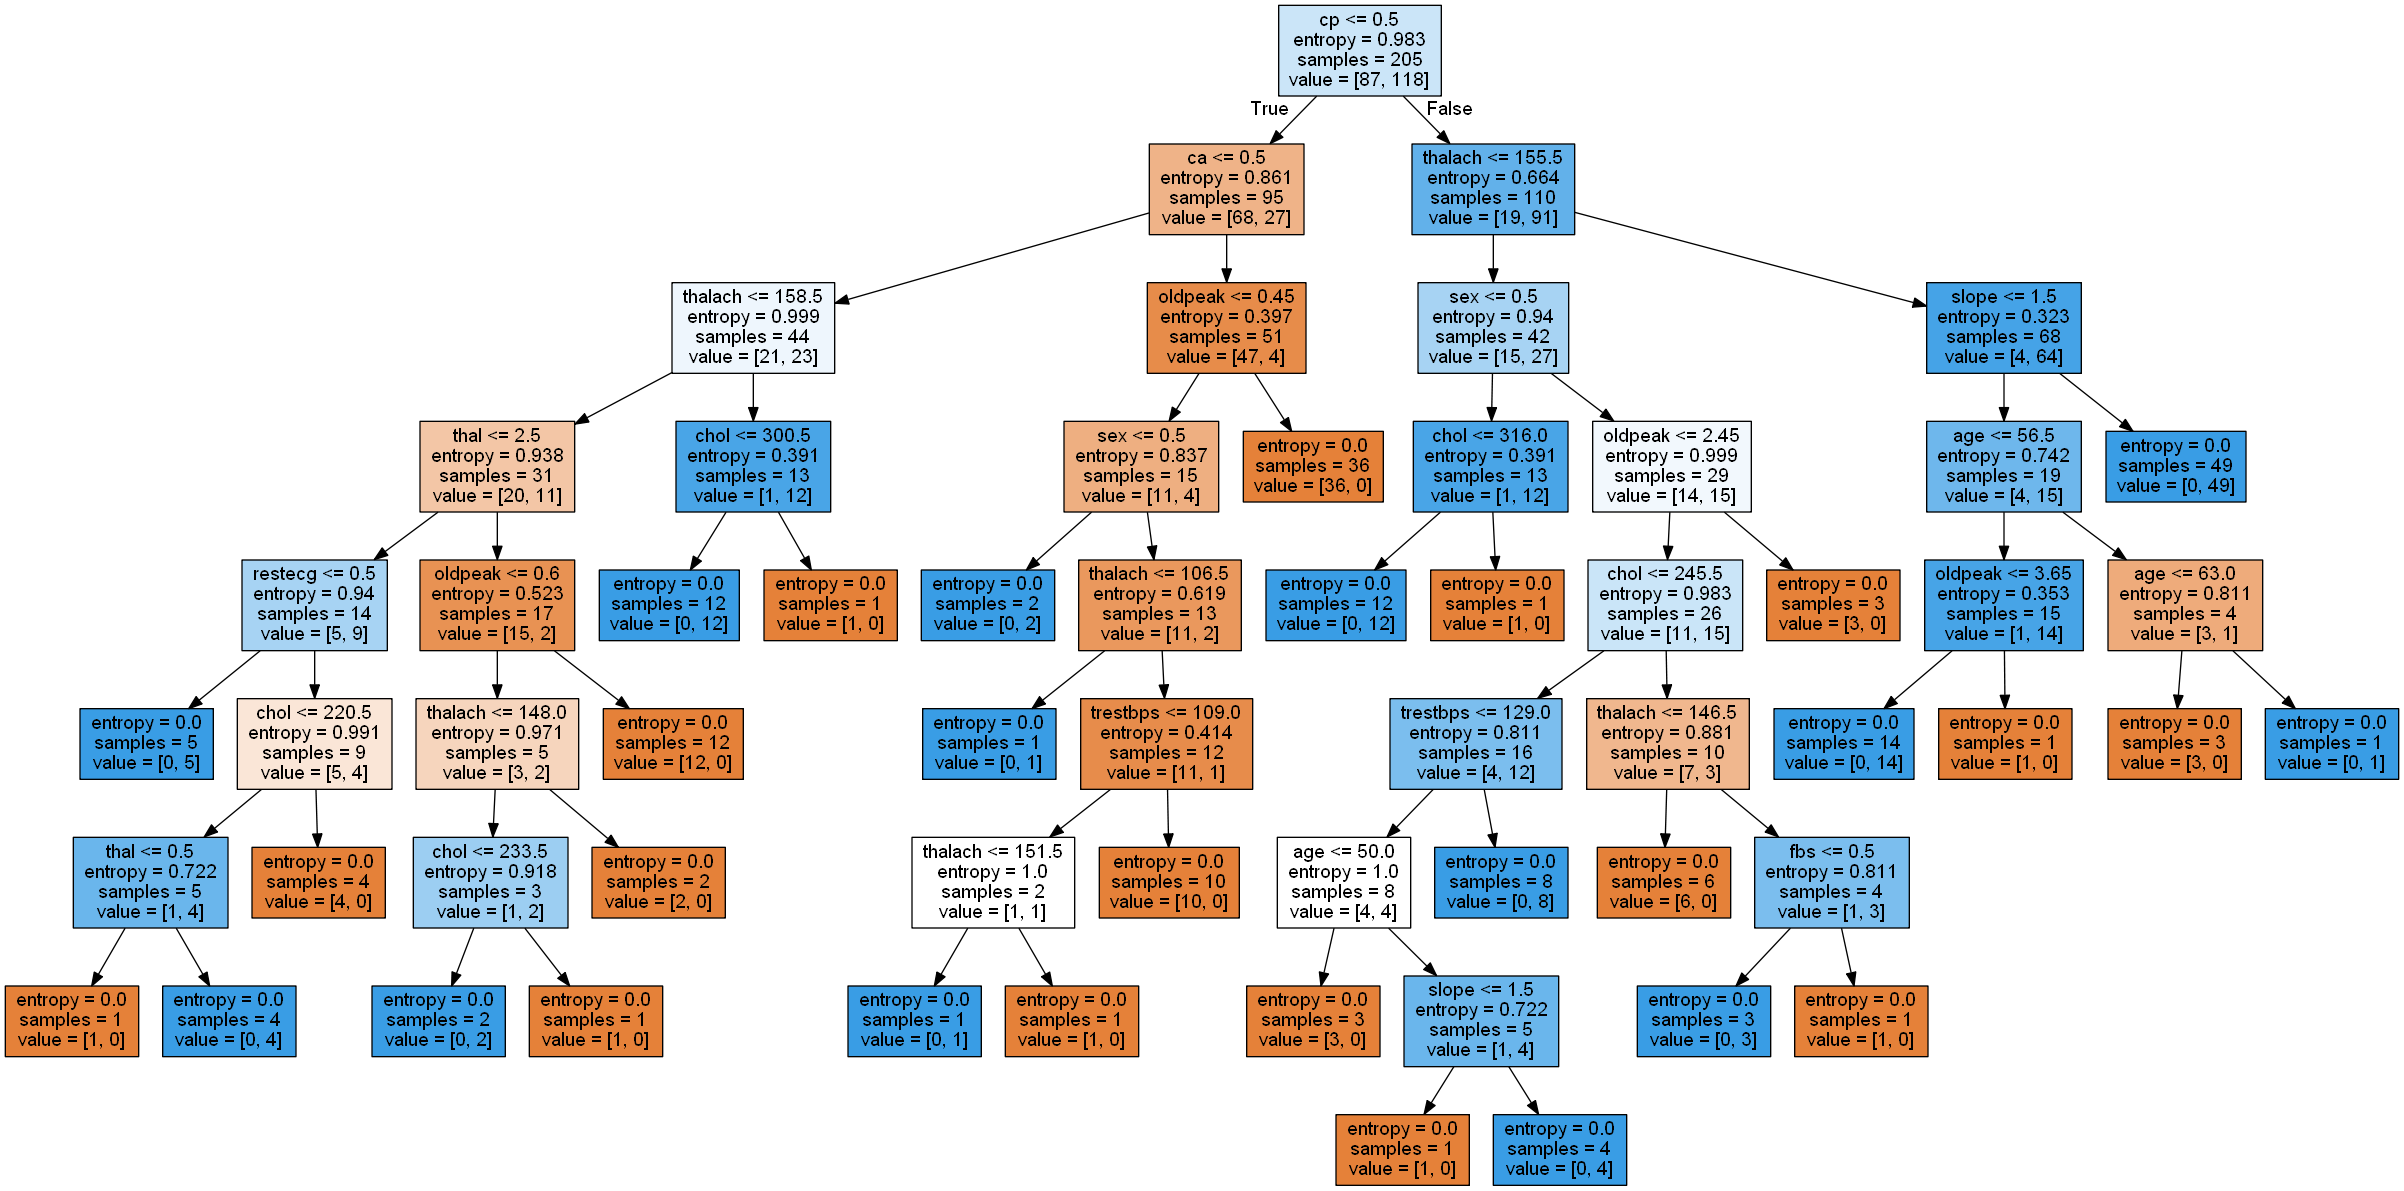

In [59]:
PATH = "best_decision_tree.png"
Image(filename = PATH , width=900, height=600)

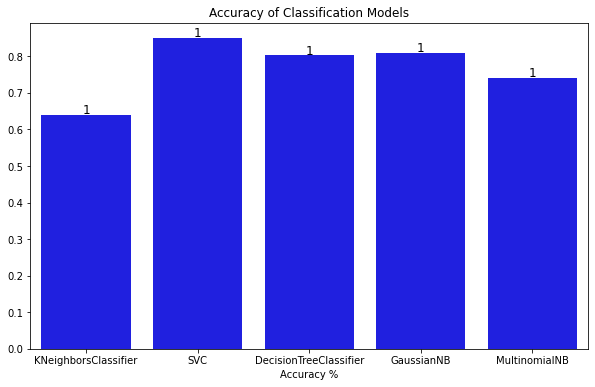

In [60]:
#visualize accuracy models
plt.figure(figsize = (10,6))
bars = sns.barplot(x = [best_classifers_performance[i][0] for i in range(len(best_classifers_performance))], y = [best_classifers_performance[i][4] for i in range(len(best_classifers_performance))], color = "blue")
for bar in bars.patches:
    bars.annotate("%.0f" % bar.get_height(), (bar.get_x() + bar.get_width()/2, bar.get_height()),
        ha='center', va='center', fontsize=12, color='black', xytext=(0,5), textcoords='offset points')
plt.xlabel('Accuracy %')
plt.title('Accuracy of Classification Models')
plt.show()

# Adabost Classifer

In [61]:
from sklearn.ensemble import AdaBoostClassifier 

clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=1))
clf.fit(X_train, y_train).score(X_test, y_test)

0.75

# Ensemble of the Hypertuned Classifiers

In [62]:
from sklearn.ensemble import StackingClassifier


estimators = [(best_classifers_performance[i][0], best_classifers_performance[i][2]) for i in range(len(best_classifers_performance[1:-1]))]

clf = StackingClassifier(estimators=estimators, final_estimator= None)
clf.fit(X_train, y_train).score(X_test, y_test)

0.8068181818181818

# Feature Selection

In [63]:
hyper_knn_with_predictions = X_test.copy(deep=True)
hyper_knn_with_predictions['Predictions'] = predictions[0]
hyper_knn_with_predictions

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Predictions
233,64,1,0,120.0,246.0,0,0,96.0,1,2.2,0,1,2,0
293,67,1,2,152.0,212.0,0,0,150.0,0,0.8,1,0,3,0
215,43,0,0,132.0,341.0,1,0,136.0,1,3.0,1,0,3,0
176,60,1,0,117.0,230.0,1,1,160.0,1,1.4,2,2,3,1
122,41,0,2,112.0,268.0,0,0,172.0,1,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,1,0,160.0,228.0,0,0,138.0,0,2.3,2,0,1,1
179,57,1,0,150.0,276.0,0,0,112.0,1,0.6,1,1,1,0
94,45,0,1,112.0,160.0,0,1,138.0,0,0.0,1,0,2,0
57,45,1,0,115.0,260.0,0,0,185.0,0,0.0,2,0,2,1


In [64]:
sample_1 = hyper_knn_with_predictions[hyper_knn_with_predictions['trestbps']>= 130][['trestbps', 'Predictions']].copy(deep= True)
sample_1['Predictions'].value_counts()

1    26
0    22
Name: Predictions, dtype: int64

In [65]:
sample_2 = hyper_knn_with_predictions[hyper_knn_with_predictions['cp'] > 0][['cp', 'Predictions']].copy(deep= True)
sample_2['Predictions'].value_counts()

1    33
0    12
Name: Predictions, dtype: int64

In [66]:
sample_3 = hyper_knn_with_predictions[(hyper_knn_with_predictions['fbs'] == 1)&(hyper_knn_with_predictions['cp'] > 0) & (hyper_knn_with_predictions['trestbps'] >= 130)][['fbs', 'Predictions']].copy(deep= True)
sample_3

,fbs,Predictions
8,1,1
93,1,1
222,1,1
29,1,1


# Confusion Matrices

## Base Classifiers

<Figure size 720x432 with 0 Axes>

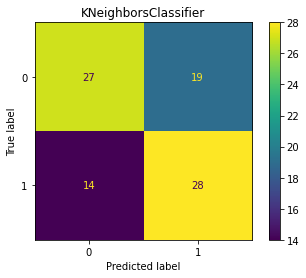

<Figure size 720x432 with 0 Axes>

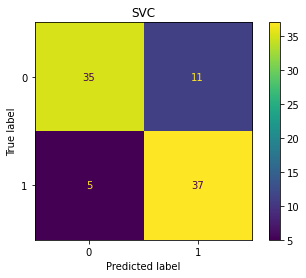

<Figure size 720x432 with 0 Axes>

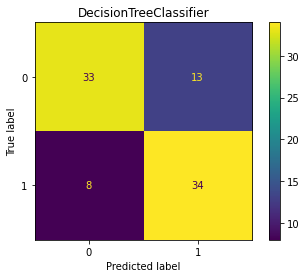

<Figure size 720x432 with 0 Axes>

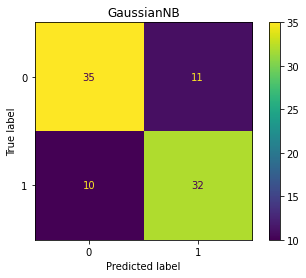

<Figure size 720x432 with 0 Axes>

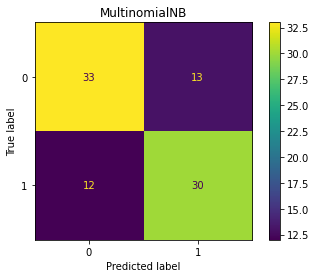

In [77]:
counts = []

for i in range(len(base_classifer_performances)):
    plt.figure(figsize=(10,6))
    matrix = confusion_matrix(base_classifer_performances[i][2], y_test)
    counts.append((matrix[1][1], matrix[1][0], matrix[0][1], matrix[1][1]))
    plot_confusion_matrix(classifiers[i], X_test, y_test)  
    plt.title(base_classifer_performances[i][0])
    plt.savefig(f'Base {base_classifer_performances[i][0]} Confusion Matrix.png', facecolor='white', transparent=False)
    plt.show()

In [78]:
counts[0]

(28, 19, 14, 28)

## Hypertuned Classifiers

In [ ]:
for i in range(len(best_classifers_performance)):
    plt.figure(figsize=(10,6))
    plot_confusion_matrix(best_classifers_performance[i][2], X_test, y_test)  
    plt.title(best_classifers_performance[i][0])
    plt.savefig(f'Best {best_classifers_performance[i][0]} Confusion Matrix.png', facecolor='white', transparent=False)
    plt.show()